In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
import keras
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/BIOINF/covid-project/dataset/train"
labels = ["covid-19", "normal", "viral-pneumonia"]

In [45]:
# CLONE GITHUB REPOSITORY
!git clone https://github.com/Gialbo/COVID-Chest-X-Rays-Deep-Learning-analysis.git

Cloning into 'COVID-Chest-X-Rays-Deep-Learning-analysis'...
remote: Enumerating objects: 310, done.
remote: Counting objects: 100% (310/310), done.
remote: Compressing objects: 100% (267/267), done.
remote: Total 310 (delta 110), reused 197 (delta 35), pack-reused 0
Receiving objects: 100% (310/310), 28.70 MiB | 52.38 MiB/s, done.
Resolving deltas: 100% (110/110), done.


In [46]:
# LOAD DIRECTORY
import os
import os.path
import sys
sys.path.append('COVID-Chest-X-Rays-Deep-Learning-analysis/data')
sys.path.append('COVID-Chest-X-Rays-Deep-Learning-analysis/models')
!cd "COVID-Chest-X-Rays-Deep-Learning-analysis/data"

In [47]:
from inceptionNet import inceptionNet

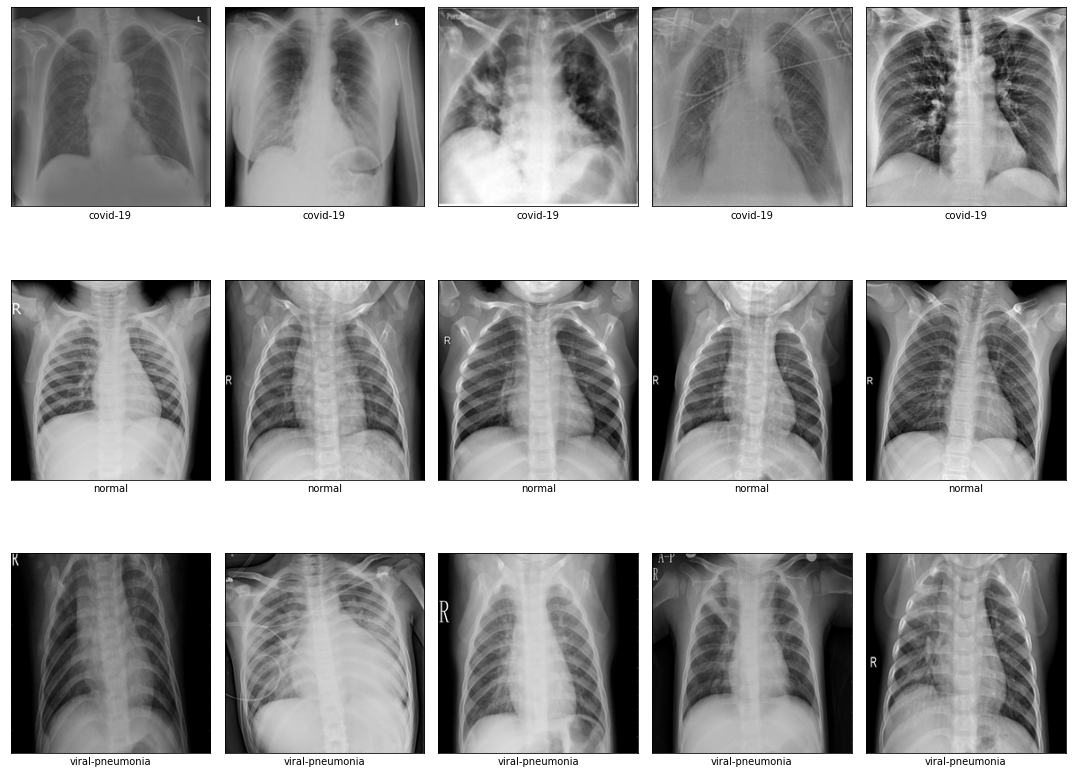

In [ ]:
fig, axs = plt.subplots(len(labels), 5, figsize = (15, 12))

class_len = {}
for i, c in enumerate(labels):
    class_path = os.path.join(path, c)
    all_images = os.listdir(class_path)
    sample_images = random.sample(all_images, 5)
    class_len[c] = len(all_images)
    
    for j, image in enumerate(sample_images):
        img_path = os.path.join(class_path, image)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel = c, xticks = [], yticks = [])

fig.tight_layout()

Text(0, 0.5, 'Number of chest x-rays ')

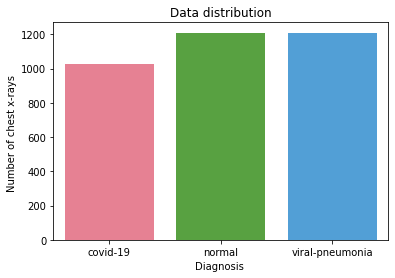

In [ ]:
sns.barplot(x=np.array(list(class_len.keys())), y=np.array(list(class_len.values())), palette = "husl")
plt.title("Data distribution")
plt.xlabel('Diagnosis ')
plt.ylabel('Number of chest x-rays ')

In [3]:
img_height = 224
img_width = 224
input_shape = (img_height, img_width, 3)
batch_size = 128
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dir = '/content/drive/MyDrive/BIOINF/covid-project/dataset/train'
test_dir = '/content/drive/MyDrive/BIOINF/covid-project/dataset/test'

Train_Gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, 
                                                            validation_split=0.2,
                                                            rotation_range = 5,
                                                            width_shift_range = 0.05,
                                                            height_shift_range = 0.05,
                                                            zoom_range = 0.01)
Test_Gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

train_ds = Train_Gen.flow_from_directory(train_dir, 
                                                target_size = (img_height, img_width), 
                                                batch_size = batch_size, 
                                                class_mode = 'categorical',
                                                subset='training',
                                                shuffle=True)

validation_ds = Train_Gen.flow_from_directory(train_dir, 
                                                target_size = (img_height, img_width), 
                                                batch_size = batch_size, 
                                                class_mode = 'categorical',
                                                subset='validation',
                                                shuffle=True)

test_ds = Test_Gen.flow_from_directory(test_dir, 
                                              target_size = (img_height, img_width),
                                              class_mode = 'categorical', 
                                              batch_size = batch_size,
                                              shuffle=False)

Found 2755 images belonging to 3 classes.
Found 688 images belonging to 3 classes.
Found 383 images belonging to 3 classes.


In [ ]:
earlystopping = EarlyStopping(
    patience = 5
)

checkpointer = ModelCheckpoint(
    filepath = '/content/drive/MyDrive/BIOINF/checkpoints_classification/modelInc/weights.hdf5', 
    save_best_only = True
)

model = inceptionNet()
history = model.fit(
    train_ds,
    validation_data = validation_ds,
    batch_size = batch_size,
    epochs = 100, 
    callbacks = [earlystopping, checkpointer]
)

Epoch 1/100
22/22 [==============================] - 72s 2s/step - loss: 0.4969 - accuracy: 0.7765 - recall: 0.7276 - recall_1: 0.7074 - recall_2: 0.6940 - precision: 0.8509 - precision_1: 0.7649 - precision_2: 0.8309 - val_loss: 12.3259 - val_accuracy: 0.3140 - val_recall: 0.9951 - val_recall_1: 0.0498 - val_recall_2: 0.0000e+00 - val_precision: 0.3027 - val_precision_1: 0.8571 - val_precision_2: 0.0000e+00
Epoch 2/100
22/22 [==============================] - 46s 2s/step - loss: 0.1161 - accuracy: 0.9639 - recall: 0.9754 - recall_1: 0.9601 - recall_2: 0.9366 - precision: 0.9906 - precision_1: 0.9595 - precision_2: 0.9720 - val_loss: 12.9481 - val_accuracy: 0.3503 - val_recall: 0.0000e+00 - val_recall_1: 1.0000 - val_recall_2: 0.0000e+00 - val_precision: 0.0000e+00 - val_precision_1: 0.3503 - val_precision_2: 0.0000e+00
Epoch 3/100
22/22 [==============================] - 45s 2s/step - loss: 0.0654 - accuracy: 0.9830 - recall: 0.9911 - recall_1: 0.9741 - recall_2: 0.9776 - precision: 0

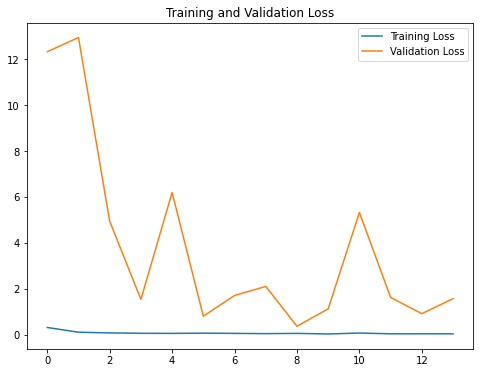

In [ ]:
train_loss = history.history["loss"]
valid_loss = history.history["val_loss"]

epochs = range(len(train_loss)) 
plt.figure(figsize=(8,6))
plt.plot(epochs, train_loss)
plt.plot(epochs, valid_loss)
plt.legend(["Training Loss", "Validation Loss"])
plt.title("Training and Validation Loss")
plt.show()

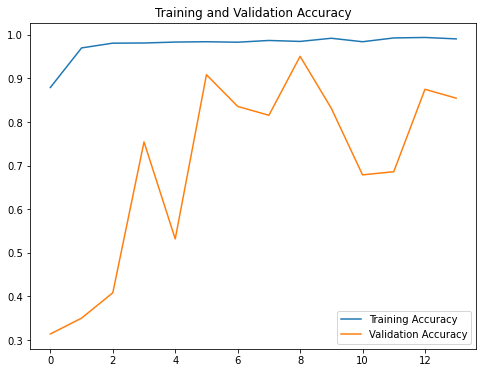

In [ ]:
train_acc = history.history["accuracy"]
valid_acc = history.history["val_accuracy"]

epochs = range(len(train_acc)) 
plt.figure(figsize=(8,6))
plt.plot(epochs, train_acc)
plt.plot(epochs, valid_acc)
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.title("Training and Validation Accuracy")
plt.show()

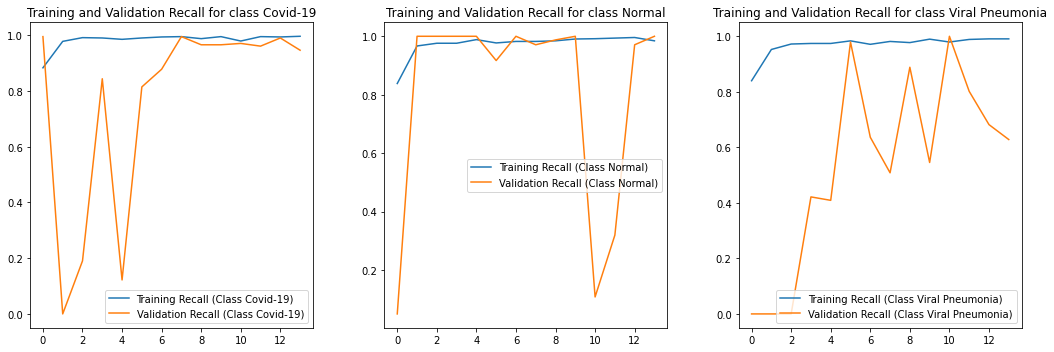

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

train_rec_0 = history.history["recall"]
valid_rec_0 = history.history["val_recall"]
train_rec_1 = history.history["recall_1"]
valid_rec_1 = history.history["val_recall_1"]
train_rec_2 = history.history["recall_2"]
valid_rec_2 = history.history["val_recall_2"]

epochs = range(len(train_rec_0)) 

axs[0].plot(epochs, train_rec_0)
axs[0].plot(epochs, valid_rec_0)
axs[0].legend(["Training Recall (Class Covid-19)", "Validation Recall (Class Covid-19)"])
axs[0].set_title("Training and Validation Recall for class Covid-19")

axs[1].plot(epochs, train_rec_1)
axs[1].plot(epochs, valid_rec_1)
axs[1].legend(["Training Recall (Class Normal)", "Validation Recall (Class Normal)"])
axs[1].set_title("Training and Validation Recall for class Normal")

axs[2].plot(epochs, train_rec_2)
axs[2].plot(epochs, valid_rec_2)
axs[2].legend(["Training Recall (Class Viral Pneumonia)", "Validation Recall (Class Viral Pneumonia)"])
axs[2].set_title("Training and Validation Recall for class Viral Pneumonia")

fig.tight_layout()

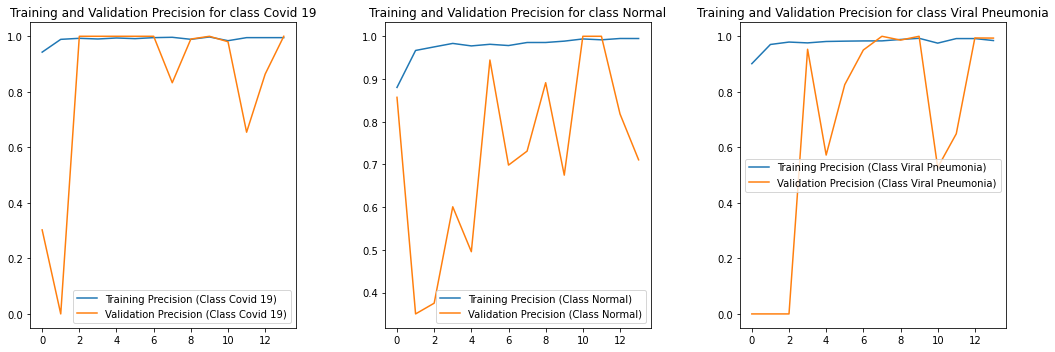

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

train_pre_0 = history.history["precision"]
valid_pre_0 = history.history["val_precision"]
train_pre_1 = history.history["precision_1"]
valid_pre_1 = history.history["val_precision_1"]
train_pre_2 = history.history["precision_2"]
valid_pre_2 = history.history["val_precision_2"]

epochs = range(len(train_pre_0)) 

axs[0].plot(epochs, train_pre_0)
axs[0].plot(epochs, valid_pre_0)
axs[0].legend(["Training Precision (Class Covid 19)", "Validation Precision (Class Covid 19)"])
axs[0].set_title("Training and Validation Precision for class Covid 19")

axs[1].plot(epochs, train_pre_1)
axs[1].plot(epochs, valid_pre_1)
axs[1].legend(["Training Precision (Class Normal)", "Validation Precision (Class Normal)"])
axs[1].set_title("Training and Validation Precision for class Normal")

axs[2].plot(epochs, train_pre_2)
axs[2].plot(epochs, valid_pre_2)
axs[2].legend(["Training Precision (Class Viral Pneumonia)", "Validation Precision (Class Viral Pneumonia)"])
axs[2].set_title("Training and Validation Precision for class Viral Pneumonia")

fig.tight_layout()

In [5]:
### LOAD WEIGHTS
weights_path = '/content/drive/MyDrive/BIOINF/checkpoints_classification/modelInc/weights.hdf5'
model = inceptionNet()
model.load_weights(weights_path)

In [44]:
model.evaluate(test_ds, verbose=2)

3/3 - 4s - loss: 0.3558 - accuracy: 0.9347 - recall_3: 0.9739 - recall_4: 0.9776 - recall_5: 0.8582 - precision_3: 1.0000 - precision_4: 0.8618 - precision_5: 0.9664


[0.355807363986969,
 0.934725821018219,
 0.9739130139350891,
 0.9776119589805603,
 0.858208954334259,
 1.0,
 0.8618420958518982,
 0.9663865566253662]

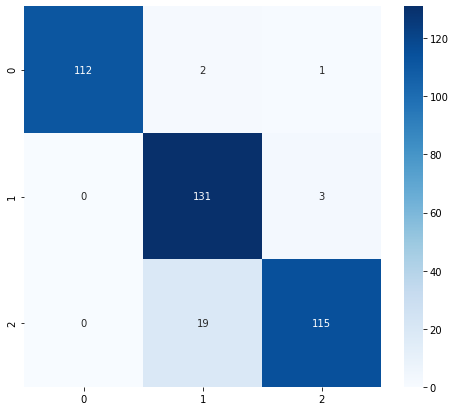

In [35]:
pred = model.predict(test_ds) 
pred = np.argmax(pred, axis = 1)


actual = test_ds.classes

plt.figure(figsize=(8,7))
cm = confusion_matrix(actual, pred, labels = [0, 1, 2])
sns.heatmap(cm,  cmap="Blues", annot = True, fmt = "d"
)

plt.show()

In [32]:
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       115
           1       0.86      0.98      0.92       134
           2       0.97      0.86      0.91       134

    accuracy                           0.93       383
   macro avg       0.94      0.94      0.94       383
weighted avg       0.94      0.93      0.93       383

